In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
from tensorflow import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv1D, MaxPooling1D, LSTM, GRU
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing.sequence import pad_sequences

#### P(정상|입력) -> P(w1, w2, w3|정상) * P(정상) -> P(w1|정상) * P(w2|정상) * P(w2|정상) * P(정상)

In [67]:
df = pd.read_csv('dataset/spam.csv', encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [68]:
df.drop(df.iloc[:, 2:5], axis=1, inplace=True)

In [69]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [70]:
df['v1'] = df['v1'].replace(['ham', 'spam'],[0, 1])
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int64 
 1   v2      5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [72]:
df.isnull().values.any()

False

In [73]:
df['v2'].nunique()

5169

In [74]:
df = df.drop_duplicates('v2', keep='first')

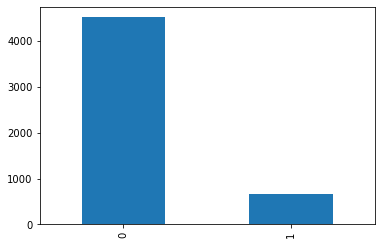

In [75]:
df['v1'].value_counts().plot(kind='bar')

In [76]:
df.groupby('v1').size()

v1
0    4516
1     653
dtype: int64

In [77]:
x_data = df['v2']
y_data = df['v1']
print(len(x_data), len(y_data))

5169 5169


In [78]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=.2, random_state=2020)

In [80]:
# 훈련 데이터를 BoW로 해줌
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(4135, 7658)


In [81]:
model = MultinomialNB()

In [82]:
model.fit(x_train_dtm, y_train)

MultinomialNB()

In [83]:
x_test_dtm = dtmvector.transform(x_test)
print(x_test_dtm.shape)

(1034, 7658)


In [84]:
predicted = model.predict(x_test_dtm) # 테스트 데이터에 대한 예측

In [85]:
print("정확도: %.4f" % accuracy_score(y_test, predicted))

정확도: 0.9758


### TF-IDF 적용한 경우

In [87]:
from sklearn.feature_extraction.text import TfidfTransformer

In [88]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(x_train_dtm.shape)

(4135, 7658)


In [92]:
model.fit(tfidfv, y_train)

MultinomialNB()

In [93]:
tfidfv_test = tfidf_transformer.fit_transform(x_test_dtm)
predicted = model.predict(tfidfv_test)

In [94]:
print("정확도: %.4f" % accuracy_score(y_test, predicted))

정확도: 0.9487


### 뉴스 데이터 분류(Naive Bayes)

In [95]:
from sklearn.datasets import fetch_20newsgroups

In [96]:
newsdata = fetch_20newsgroups(subset='train')
print(newsdata.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [97]:
len(newsdata.data), len(newsdata.filenames), len(newsdata.target_names),len(newsdata.target)

(11314, 11314, 20, 11314)

In [98]:
print(newsdata.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [99]:
print(newsdata.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







### Data 전처리
- 토큰화
- BoW로 만들어줘야함

In [100]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(newsdata.data)
x_train_dtm.shape

(11314, 130107)

In [107]:
model = MultinomialNB()
model.fit(x_train_dtm, newsdata.target)

MultinomialNB()

In [110]:
newsdata_test = fetch_20newsgroups(subset='test', shuffle=True) # 테스트 데이터 갖고오기
X_test_dtm = dtmvector.transform(newsdata_test.data)  # 테스트 데이터를 DTM으로 변환newsdata_test = fetch_20newsgroups(subset='test', shuffle=True) # 테스트 데이터 갖고오기

In [111]:
predicted = model.predict(X_test_dtm)

In [113]:
print("정확도: %.4f" % accuracy_score(newsdata_test.target, predicted))

정확도: 0.7728


### TF-IDF 적용

In [115]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(11314, 130107)


In [116]:
model2 = MultinomialNB()
model2.fit(tfidfv, newsdata.target)

MultinomialNB()

In [117]:
tfidfv_test = tfidf_transformer.transform(X_test_dtm)

In [118]:
predicted = model2.predict(tfidfv_test)
print("정확도: %.4f" % accuracy_score(newsdata_test.target, predicted))

정확도: 0.7739
